## サンプルデータを読み込む

In [1]:
import pandas as pd

# csvの読み取り
df = pd.read_csv('stock_data/4689.csv', index_col='Date', parse_dates=True, dtype=float)
df = df.dropna() # 無効なデータ行を削除
df.head()

,Open,Hight,Low,Close,Volume,Adj Close
Date,,,,,,
1997-11-04,1998848.0,1998848.0,1998848.0,1998848.0,318.0,2.4
1997-11-05,1933312.0,2170880.0,1753088.0,2039808.0,632.0,2.5
1997-11-06,2072576.0,2187264.0,2056192.0,2056192.0,220.0,2.5
1997-11-07,2097152.0,2170880.0,2031616.0,2113536.0,106.0,2.6
1997-11-10,2048000.0,2056192.0,1990656.0,1998848.0,40.0,2.4


## データの切り出し

2000年以降のデータを取得する

In [2]:
price = df["2000/1/1":]
price.head()

,Open,Hight,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,93399040.0,93399040.0,93399040.0,93399040.0,4.0,456.1
2000-01-05,93390848.0,93399040.0,91400192.0,91400192.0,46.0,446.3
2000-01-06,91400192.0,91400192.0,89399296.0,89399296.0,8.0,436.5
2000-01-07,87400448.0,87400448.0,87400448.0,87400448.0,8.0,426.8
2000-01-11,89399296.0,89399296.0,89399296.0,89399296.0,3.0,436.5


## サンプリング期間の変更

pandas では日次のデータを週次や月次に変更できる 
.first() とすると月の始めが選択されて 
.last() とすると月末が選択される

In [3]:
print(df.resample("M").first().tail())

             Open  Hight    Low  Close      Volume  Adj Close
Date                                                         
2018-07-31  367.0  368.0  362.0  362.0  14493900.0      362.0
2018-08-31  419.0  429.0  411.0  416.0  25746300.0      416.0
2018-09-30  382.0  383.0  378.0  379.0  10992200.0      379.0
2018-10-31  412.0  412.0  407.0  411.0  15342700.0      411.0
2018-11-30  353.0  354.0  320.0  324.0  76551400.0      324.0


日次のデータを年次に変更する .first() や .last() を指定しないとその期間の平均値となる

In [4]:
import matplotlib.pyplot as plt
df.resample("A").Close.plot(color='r')
plt.show()

<Figure size 640x480 with 1 Axes>

### 株価データの 変化率(pct_change), 差分(diff), 累積合計(cumsum)

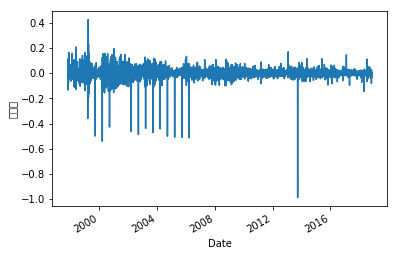

In [5]:
df.Close.pct_change().plot()
plt.ylabel('変化率')
plt.show()

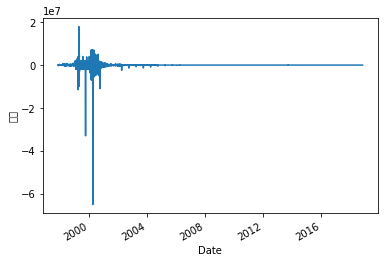

In [6]:
df.Close.diff().plot()
plt.ylabel('差分')
plt.show()

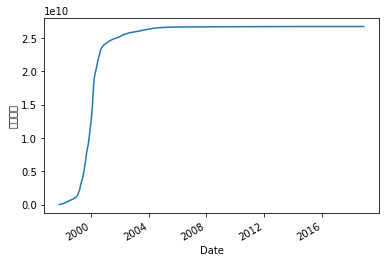

In [7]:
df.Close.cumsum().plot()
plt.ylabel('累積合計')
plt.show()

### 計数(count), ４分位(quantile), 合計(sum), 平均(mean), 中央値(median), 分散(var), 標準偏差(std), 歪度(skew), 尖度(kurt)

In [8]:
import numpy as np
c = df.Close["2010/1/1":]
print("計数", c.count())
print("４分位", c.quantile())
print("合計", c.sum())
print("平均", c.mean())
print("中央値", c.median())
print("分散", c.var())
print("標準偏差", c.std())
print("歪度", c.skew())
print("尖度", c.kurt())

計数 2175
４分位 525.0
合計 29859766.0
平均 13728.628045977011
中央値 525.0
分散 268332438.44162327
標準偏差 16380.855851927374
歪度 0.6808021108612692
尖度 -0.9469251743942255


### 移動平均
pandas の Series.rolling を用いて株価の終値の250日移動平均を取得してみよう

In [9]:
df.Close.rolling(window=250).mean()

Date
1997-11-04        NaN
1997-11-05        NaN
1997-11-06        NaN
1997-11-07        NaN
1997-11-10        NaN
1997-11-11        NaN
1997-11-12        NaN
1997-11-13        NaN
1997-11-14        NaN
1997-11-17        NaN
1997-11-18        NaN
1997-11-19        NaN
1997-11-20        NaN
1997-11-21        NaN
1997-11-25        NaN
1997-11-26        NaN
1997-11-27        NaN
1997-11-28        NaN
1997-12-01        NaN
1997-12-02        NaN
1997-12-03        NaN
1997-12-04        NaN
1997-12-05        NaN
1997-12-08        NaN
1997-12-09        NaN
1997-12-10        NaN
1997-12-11        NaN
1997-12-15        NaN
1997-12-16        NaN
1997-12-17        NaN
               ...   
2018-10-03    457.356
2018-10-04    456.864
2018-10-05    456.332
2018-10-09    455.760
2018-10-10    455.228
2018-10-11    454.636
2018-10-12    454.092
2018-10-15    453.524
2018-10-16    452.980
2018-10-17    452.460
2018-10-18    451.912
2018-10-19    451.340
2018-10-22    450.740
2018-10-23    450.116
2018-

始めから 250日間 は NaN になります

In [12]:
### 指数移動平均

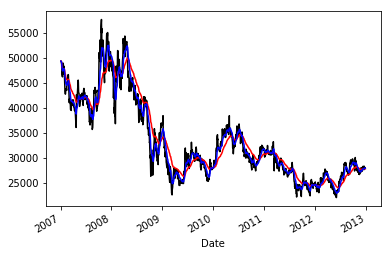

In [11]:
a = df.Close['2007/1/1':'2013/1/1']
a.plot(color='black')
a.ewm(span=60).mean().plot(color='r')
a.ewm(span=15).mean().plot(color='b')
plt.show()